<a href="https://colab.research.google.com/github/BonaldSo/project_myperceptron/blob/main/MyPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
# TODO: add any other package you need

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
filename = 'iris.csv'
urllib.request.urlretrieve(url, filename)

# Load the dataset into a Pandas dataframe
column_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]
data = pd.read_csv(filename, names=column_names)


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Code for dataset splitting (training-testing):

In [ ]:
import random

def split(d):
  shuffle = data.sample(frac = 1, random_state = random.randint(0, 10000))
  split = int(0.8 * len(shuffle))
  train = shuffle.iloc[:split]
  test = shuffle.iloc[split:]
  return train, test

In [ ]:
import numpy as np

class Perceptron:
  # initialising the perceptron
  def __init__(self, t, label):
    self.w = np.array([0] * len(t)) # weight
    self.bias = 0 # bias
    self.t = t # fields of xi
    self.label = label # sign of xi
    self.y = 1 # class defined as positive

  # predict function
  def predict(self, s):
    return self.w @ s + self.bias

  def train(self, d):
    for i in range(0, len(d)):
      # create each xi in d
      x = np.array([0] * len(self.t))
      for j in range(0, len(self.t)):
        x[j] += d.iloc[i].at[self.t[j]]
      x = np.transpose(x)
      # check label of sign of training data
      y = d.iloc[i].at[self.label]
      # calculate score function
      sc = self.predict(x)
      sign = 0
      if (sc > 0 and y != self.y):
        # false positive
        sign = -1
      if (sc <= 0 and y == self.y):
        # false negative
        sign = 1
      if (sign != 0):
        # update weight and bias if mistake happens
        self.w = self.w + sign*np.transpose(x)
        self.bias += sign

Code for implementing a wrapper function:
- Handling multi-class extension
- Feeding in data and call Perceptron training function
- Outputing multiple Perceptrons that are trained

In [ ]:
def multiclass_extension(perceptron, dat, t, sign):
  if (len(perceptron) == 0):
    # no perceptrons trained, train new perceptrons given dat, t, sign
    label = []
    for d in range(0, len(dat)):
      if not (dat.iloc[d].at[sign] in label):
        # new class discovered
        label.append(dat.iloc[d].at[sign])
    for l in label:
      # create an one vs all perceptron for each class
      pi = Perceptron(t, sign)
      pi.y = l
      perceptron.append(pi)
  for p in perceptron:
    # train each perceptron using dat
    p.train(dat)
  return perceptron

Code for testing and ploting:



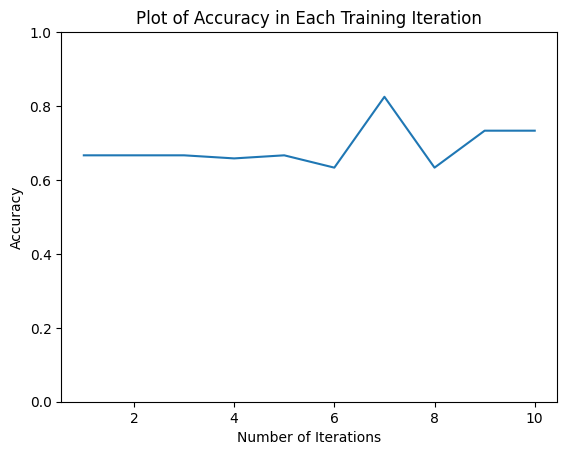

In [ ]:
import matplotlib.pyplot as plt

t = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # fields of xi
sign = 'class' # sign of xi
train, test = split(data) # get train and test set
accuracy_list = [] # track accuracy in each iteration
perc = [] # keep perceptrons
for i in range (0, 10):
  # get trained perceptrons
  per = multiclass_extension(perc, train, t, sign)
  correct = 0
  for j in range(0, len(train)):
    # create xi for each training data
    x = np.array([0] * len(t))
    for k in range(0, len(t)):
      x[k] += train.iloc[j].at[t[k]]
    x = np.transpose(x)
    pd = None
    maxv = None
    for p in perc:
      # update guess if None or predicted score is higher
      if maxv == None:
        maxv = p.predict(x)
        pd = p.y
      elif max(maxv, p.predict(x)) == p.predict(x):
        maxv = p.predict(x)
        pd = p.y
    if train.iloc[j].at[sign] == pd:
      # correct classification
      correct += 1
  final = correct / len(train)
  # add accuracy of this iteration into list
  accuracy_list.append(final)

# plot
x = np.linspace(1, 10, 10)
fig, p = plt.subplots()
p.plot(x, accuracy_list)
plt.ylim(0, 1)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
p.set_title('Plot of Accuracy in Each Training Iteration')
plt.show()



In [ ]:
correct = 0
for j in range(0, len(test)):
  # create xi for each training data
  x = np.array([0] * len(t))
  for k in range(0, len(t)):
    x[k] += test.iloc[j].at[t[k]]
  x = np.transpose(x)
  pd = None
  maxv = None
  for p in perc:
    # update guess if None or predicted score is higher
    if maxv == None:
      maxv = p.predict(x)
      pd = p.y
    elif max(maxv, p.predict(x)) == p.predict(x):
      maxv = p.predict(x)
      pd = p.y
  if test.iloc[j].at[sign] == pd:
    # correct classification
    correct += 1
final = correct / len(test)

# final accuracy
print('The Final accuracy on test dataset is ', final)

The Final accuracy on test dataset is  0.6666666666666666
